In [1]:
# Importing librarie
 
import pandas as pd
import numpy as np
import statistics
import time

from TREEplus import *

pd.options.mode.chained_assignment = None

pd.set_option('display.max_rows', None)

C:\Users\danie\AppData\Local\Temp\ipykernel_2348\2585506773.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Iteration

#df = make_df()
rows = 400
df_orig = pd.read_csv("heart_data_pre_imp.csv")

df = df_orig.iloc[:rows]

print(df.shape)

set(df_orig["Race"].dropna())



(400, 18)


{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0}

In [3]:
num_var = ["PhysicalHealth", "MentalHealth", "SleepTime", "BMI"]

bin_var = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Sex", "PhysicalActivity", "KidneyDisease", "SkinCancer"]

class_var =["AgeCategory", "Race", "Diabetic", "GenHealth", "Asthma"]

cat_var = bin_var + class_var

#feature_var = "college_education"

for i in num_var:
    df[i]= df[i].astype("int", errors = "ignore")

for i in bin_var+ class_var:
    df[i] = df[i].astype("str", errors = "ignore")

feature_var = "HeartDisease"

_problem = "classifier"

In [4]:
for i in df.columns:
    df[i].replace("nan", np.nan, inplace = True)

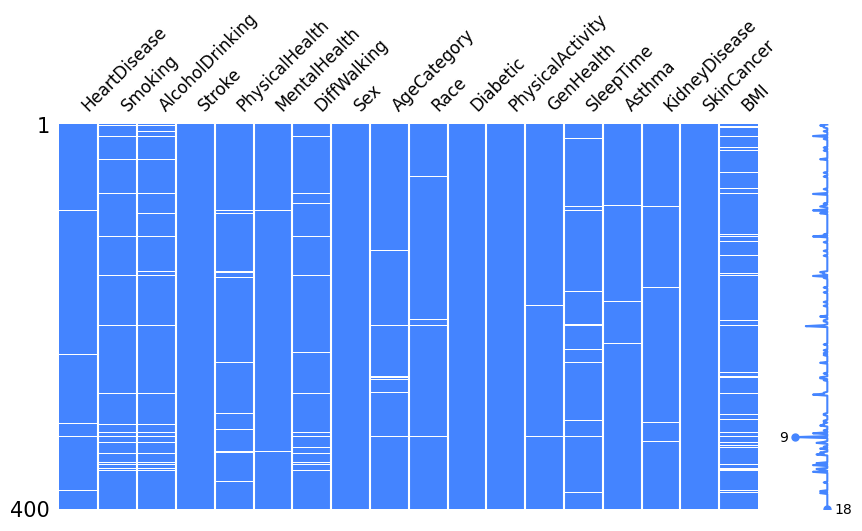

In [5]:
import missingno
missingno.matrix(df, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0));

In [6]:
df.isna().sum().sum()


136

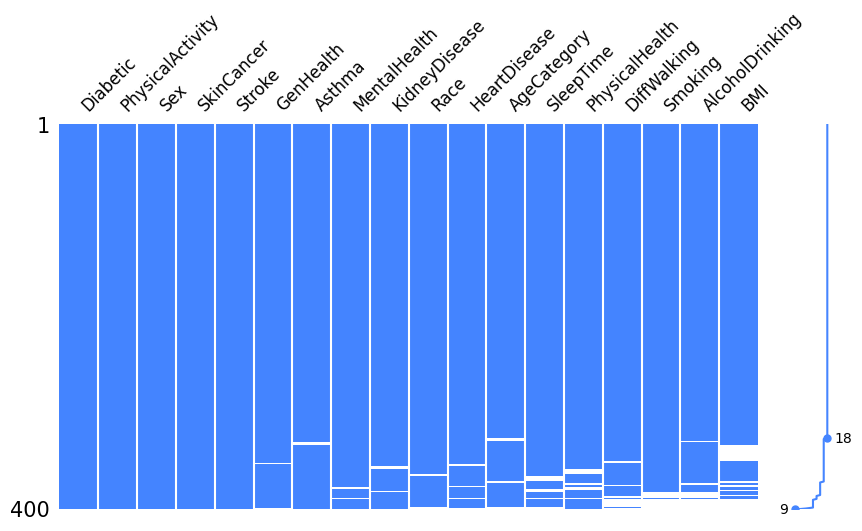

In [7]:
binpi = BINPI(df, num_var, bin_var, class_var, weak_learners = 3)

df2 = binpi.lexicographical_matrix()

missingno.matrix(df2, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0));

In [8]:
#want an alligned list, one with the rows, and one with the column names

#before lexographical
missingvalsdf = {}
for i in df.columns:
    rows = np.nonzero(pd.isnull(df[i].tolist()))
    missingvalsdf[i] = rows[0].tolist()


In [9]:
#after lexographical

missingvalsdf2 = {}
for i in df2.columns:
    rows = np.nonzero(pd.isnull(df2[i].tolist()))
    missingvalsdf2[i] = rows[0].tolist()


In [10]:
df_binpi = binpi.binpi_imputation() 


Feature Variable:  AgeCategory 
Missing Values:  136

Iteration 1
Split Found:  n1 [['BMI', 28.31277333668337, 0.013116635921667466, 0]] start
node_proportion_total  0.01119917519978264
Split Found:  n2 [['GenHealth', ('5.0', '2.0', '3.0', '1.0'), 0.021342790236748573, 1]] left
node_proportion_total  0.5762195990410706
Node_proportion_gain  0.5650204238412879
Split Found:  n4 [['MentalHealth', 1.0, 0.1247900571044675, 2]] left
node_proportion_total  0.6472416681450803
Node_proportion_gain  0.07102206910400977
Split Found:  n8 [['PhysicalActivity', '0.0', 0.36000000000000054, 3]] left
node_proportion_total  0.6896605481861309
Node_proportion_gain  0.042418880041050544
Split Found:  n9 [['BMI', 24.836145124716552, 0.15195312499999994, 3]] right
node_proportion_total  0.7177844609773802
Node_proportion_gain  0.028123912791249372
Split Found:  n5 [['AlcoholDrinking', '0.0', 0.02029857743415541, 2]] right
node_proportion_total  0.7383735825602611
Node_proportion_gain  0.020589121582880843


In [11]:
predictors = []
predicted = []
for i in df_binpi.columns:
    for j in missingvalsdf2[i]:
        predictors.append(i)
        predicted.append(df_binpi.loc[j, i])

df_result_binpi = pd.DataFrame(
    {'Predictor':predictors,
     'Predicted Value BINPI': predicted
    })

Sklearn Comparison


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

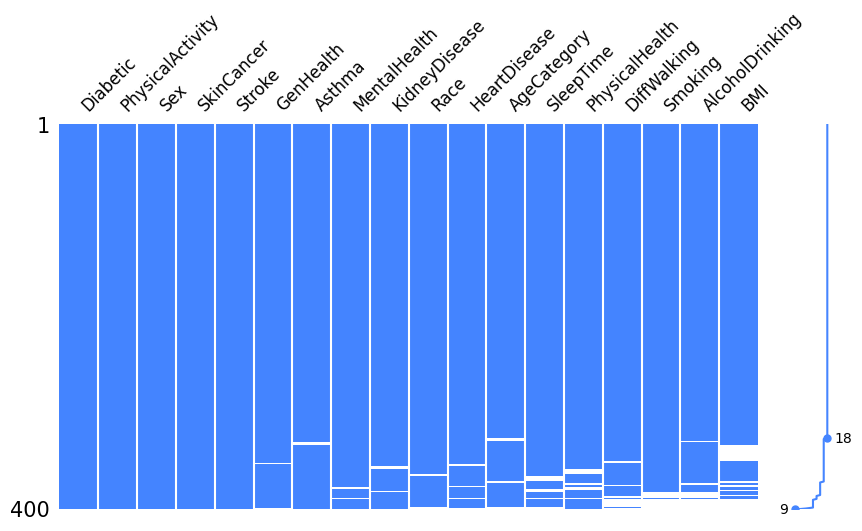

In [13]:
binpi = BINPI(df, num_var, bin_var, class_var, weak_learners = 3)

#id_matrix = binpi.id_matrix_creator(df)

df2 = binpi.lexicographical_matrix()

missingno.matrix(df2, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0));

In [14]:
df2.head()

,Diabetic,PhysicalActivity,Sex,SkinCancer,Stroke,GenHealth,Asthma,MentalHealth,KidneyDisease,Race,HeartDisease,AgeCategory,SleepTime,PhysicalHealth,DiffWalking,Smoking,AlcoholDrinking,BMI
0,1.0,1.0,0,1.0,0.0,2.0,1.0,30.0,0.0,1.0,0.0,8.0,5.0,3.0,0.0,1.0,0.0,16.600134
4,3.0,1.0,0,0.0,1.0,2.0,3.0,0.0,0.0,1.0,0.0,13.0,7.0,0.0,0.0,0.0,0.0,20.334711
5,1.0,1.0,1,0.0,0.0,4.0,1.0,30.0,0.0,1.0,0.0,10.0,8.0,20.0,0.0,0.0,0.0,26.578450
6,3.0,0.0,0,1.0,0.0,3.0,3.0,0.0,0.0,1.0,0.0,12.0,6.0,0.0,0.0,0.0,0.0,24.207989
8,3.0,1.0,0,0.0,0.0,2.0,3.0,0.0,0.0,1.0,0.0,5.0,8.0,28.0,1.0,0.0,0.0,23.707598


In [15]:
df_sklearn = binpi.binpi_imputation( sklearn = True)


Feature Variable:  AgeCategory 
Missing Values:  136
imp time 0.017943382263183594
time 0.02784585952758789

Feature Variable:  AgeCategory 
Missing Values:  135
imp time 0.0009663105010986328
time 0.005001068115234375

Feature Variable:  AgeCategory 
Missing Values:  134
imp time 0.0009500980377197266
time 0.004006147384643555

Feature Variable:  AlcoholDrinking 
Missing Values:  133
imp time 0.012576580047607422
time 0.015591859817504883

Feature Variable:  Asthma 
Missing Values:  132
imp time 0.022572040557861328
time 0.026651382446289062

Feature Variable:  Asthma 
Missing Values:  131
imp time 0.0029997825622558594
time 0.009000062942504883

Feature Variable:  Asthma 
Missing Values:  130
imp time 0.00099945068359375
time 0.0069997310638427734

Feature Variable:  BMI 
Missing Values:  129
imp time 0.015623092651367188
time 0.020113706588745117

Feature Variable:  BMI 
Missing Values:  128
imp time 0.0
time 0.0

Feature Variable:  BMI 
Missing Values:  127
imp time 0.0
time 0.0



In [16]:
#def imputation_process_sklearn(df2, feature_var, row_no, pos, num_var, bin_var, class_var, old_model_fit = "", old_model="",  previous_var= ""):
#  '''Creates an adaboost ensemble based on 3 types of adaboost functionality (depending on variable type) to be used for prediction
#  on first missing value, which is then imputed'''
#  
#  #print(df2.shape)
#  complete_df = df2.iloc[0:row_no].copy() 
#  complete_df.reset_index(drop = True, inplace = True)  
#    
#  #print(complete_df.shape, row_no, complete_df.isna().sum().sum())             
#
#  y = complete_df[feature_var]
#  complete_df.drop(feature_var, axis = 1, inplace = True)
#  X = complete_df
#  prediction_feat = df2.iloc[row_no].copy()
#  prediction_feat.drop(feature_var, inplace = True)
#  
#  #print(y.isna().sum())
#
#  #As a temporary fix for multiple missing values, will use mean imputation for a secondary, tertiary etc missing value temporarily 
#  for series_name in X.columns:                                  
#        if checkNaN(prediction_feat[series_name]):
#            if series_name in cat_var:
#                prediction_feat[series_name] = Counter(X[series_name][X[series_name].notna()]).most_common(1)[0][0] 
#                #print("prediction_feat", series_name ,Counter(X[series_name][X[series_name].notna()]).most_common(1)[0][0])
#            else:
#                prediction_feat[series_name] = round(mean(X[series_name][X[series_name].notna()]),0)
#
#  imp_time_start = time.time()
#  if feature_var in num_var:
#    if feature_var != previous_var:
#      model = AdaBoostRegressor(random_state = 42, n_estimators = 3)
#      model_fit = model.fit(X.values,y.values)
#      yhat = model.predict([prediction_feat])
#    else:
#      yhat = old_model_fit.predict([prediction_feat])
#      model, model_fit = old_model, old_model_fit
#  
#  elif feature_var in bin_var:
#    if feature_var != previous_var:
#      model = AdaBoostClassifier(random_state = 42, n_estimators = 3)
#      model_fit = model.fit(X.values,y.values)
#      yhat = model.predict([prediction_feat])
#    else:
#      yhat = old_model_fit.predict([prediction_feat])
#      model, model_fit = old_model, old_model_fit
#
#  elif feature_var in class_var:
#    if feature_var != previous_var:
#      model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3),  random_state = 42, n_estimators = 3)
#      model_fit = model.fit(X.values,y.values)
#      yhat = model.predict([prediction_feat]) 
#    else:
#      yhat = old_model_fit.predict([prediction_feat])
#      model, model_fit = old_model, old_model_fit
#  else: 
#    print("Error, found variable missing from variable lists")
#
#  df2.iloc[row_no, pos-1] = yhat[0]
#  previous_var = feature_var
#
#  return model_fit, model, previous_var
#

In [17]:
#dict_match = matches_dict(column_vect)
#
#last_nan = 0
#iteration = 0 
#while df2.isna().any().any() > 0: #iterates until there arent any na values
#  
#  start = time.time()
#  iteration +=1
#  
#  row_no, column_vect, last_nan, skip_point = first_nan(df2, column_vect, last_nan)        #finds first nan
#  feature_var, pos = feature_variable(df2, row_no)
#  
#  if skip_point[0]:   #the skip point allows the algorithm to reuse the last generated ensemble
#  
#    #feature_var, pos = feature_variable(df2, row_no)
#
#    for i in range(dict_match[" ".join(skip_point[3])]):     
#  
#      if iteration >1:
#        model_fit_1, model_1, previous_var_1 = imputation_process_sklearn(df2, feature_var, row_no, pos,  num_var, bin_var, 
#                                                                  class_var, old_model_fit, old_model,  previous_var)
#      else:
#        model_fit_1, model_1, previous_var_1 = imputation_process_sklearn(df2, feature_var, row_no, pos,  num_var, bin_var, class_var)
#
#      old_model_fit, old_model,  previous_var = model_fit_1, model_1, previous_var_1
#      
#      print("time", time.time() - start)
#      iteration +=1
#      
#      if i >0:
#        column_vect[row_no] = (skip_point[1]-1, skip_point[2], skip_point[3]) 
#        # for multi missing points, to stop it from going back in
#      print(column_vect[row_no])
#      row_no+=1
#    continue
#
#  feature_var, pos = feature_variable(df2, row_no)
#  print("Iteration:",iteration,"/ Row Number of Observation for Prediction:",row_no, "/ Missing Variable:",feature_var)
#  
#  if iteration >1:
#    model_fit_1, model_1, previous_var_1 = imputation_process_sklearn(df2, feature_var, row_no, pos,  num_var, bin_var, class_var, 
#                                                              old_model_fit, old_model,  previous_var)
#  else:
#    model_fit_1, model_1, previous_var_1 = imputation_process_sklearn(df2, feature_var, row_no, pos,  num_var, bin_var, class_var)
#  old_model_fit, old_model,  previous_var = model_fit_1, model_1, previous_var_1
#  print("time", time.time() - start)

Comparison

In [18]:
#df_sklearn = df2.copy()

In [19]:
#predictors = []
predicted = []
for i in df_sklearn.columns:
    for j in missingvalsdf2[i]:
        #predictors.append(i)
        predicted.append(df_sklearn.loc[j, i])

#df_result_sklearn = pd.DataFrame(
#    {'Predictor':predictors,
#     'Predicted Value Sklearn': predicted
#    })

df_result_binpi['Predicted Value Sklearn'] = predicted

df_result_binpi.style.hide()

Predictor,Predicted Value BINPI,Predicted Value Sklearn
GenHealth,1.0,1.0
GenHealth,4.0,4.0
Asthma,3.0,3.0
Asthma,3.0,3.0
Asthma,3.0,3.0
MentalHealth,0.000000,0.000000
MentalHealth,0.000000,0.000000
MentalHealth,0.000000,0.000000
KidneyDisease,0.0,0.0
KidneyDisease,0.0,0.0


In [20]:
df_result_binpi

,Predictor,Predicted Value BINPI,Predicted Value Sklearn
0,GenHealth,1.0,1.0
1,GenHealth,4.0,4.0
2,Asthma,3.0,3.0
3,Asthma,3.0,3.0
4,Asthma,3.0,3.0
5,MentalHealth,0.0,0.0
6,MentalHealth,0.0,0.0
7,MentalHealth,0.0,0.0
8,KidneyDisease,0.0,0.0
9,KidneyDisease,0.0,0.0


In [21]:
#cat_var = ["ShelveLoc", "Urban", "US"]

disagreements = 0 
total = 0
for i in range(df.isna().sum().sum()):
    if df_result_binpi.loc[i, "Predictor"] in cat_var:
        total +=1
        if df_result_binpi.loc[i, "Predicted Value Sklearn"] != df_result_binpi.loc[i, "Predicted Value BINPI"]:
            disagreements += 1
print(disagreements/total*100,"%", total)

0.0 % 76


In [22]:
#num_var

avg_diff = 0
total = 0 

for i in range(df.isna().sum().sum()):
    if df_result_binpi.loc[i, "Predictor"] in num_var:
        total +=1
        avg_diff += abs(df_result_binpi.loc[i, "Predicted Value Sklearn"] - df_result_binpi.loc[i, "Predicted Value BINPI"])
avg_diff/total

0.12935269970795074